# The Motile Ballistic - Volvox MTE model with Reference Temperature

### This models a motile organism operating at low Reynold's number (Re<1) with volvox like hollow-sphere morphology.


$B = 4B_0 e^\frac{-E_a}{KT} a^2 R   +  \frac{6 \pi a^{1+2b}}{\epsilon} \eta_0^3 e^\frac{3A}{T-C}\beta^2 \rho(T,C_{salt})$


$U = C_\infty \pi a^{2+b} \beta \left(\eta_0 e^\frac{A}{T-C}\right)^{-m} $

$X = C_\infty \pi  \beta \left(\eta_0 e^\frac{A}{T-C}\right)^{-m} $

$Y = 4B_0 e^\frac{-E_a}{KT}R$

$Z =  \frac{6 \pi}{\epsilon} \eta_0^3 e^\frac{3A}{T-C}\beta^2 \rho(T,C_{salt})$

### For b =  1:
 ### $a \ge \frac{Y}{X-Z} $

In [11]:
import numpy as np
from matplotlib import pyplot as plt

### Parameters:

In [12]:
r = 1e-8

epsilon = 0.01         ##### DOUBLE CHECK SCALING

b0 = np.exp(15)      #MTE normalization constant, value taken from unicells from J. Brown "Towards a MTE"
beta = 1
m = 1              #Estimates range from 0.75-4
eta0= 0.02939e-3   #Dynamic viscosity constant of water, [Pa*s], [kg/m*s]
A = 507.88             #Vogel equation constant for water [K]
C = 149.3              #Vogel equation second constant for water [K]
K = 8.617333262e-5      #Boltzmann's Constant [eV K^-1]

alpha = 1            #Exponential scaling coefficient, 3/4 for multicellular euks, 1 for unicellular euks.
b = 0.79
rho = 1.15

Ea = 0.62

B0 = b0*((4/3)*np.pi*rho)**alpha


# Variables
T = np.linspace(-5,10,100)+273.15  #Temperature [K]
T0 = 293.15

### Volvox Size Function:

In [13]:
def VolvoxRad(T,Cinf,Ea):
    X = Cinf*np.pi*beta*eta0**-m *np.exp(-m*A/(T-C))
    Y = 4*B0*np.exp(Ea*(T-T0)/(K*T*T0))*r
    Z = 6*np.pi*eta0**3 * beta**2* rho * np.exp(A*(1-2*m)/(T-C))/epsilon
    a = Y / (X-Z)

    return a

### Contour Plots for Varying $E_a$:

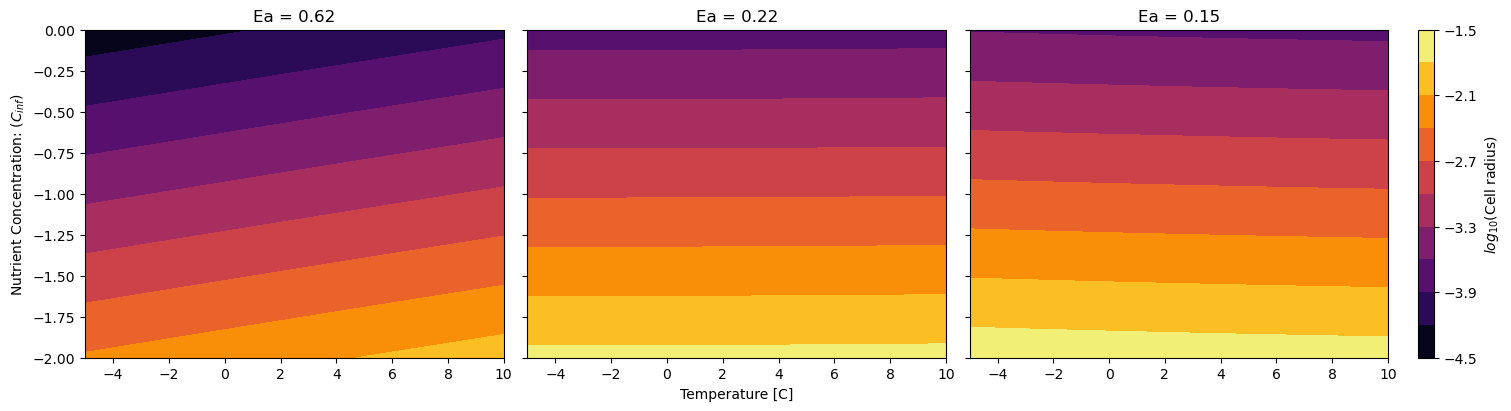

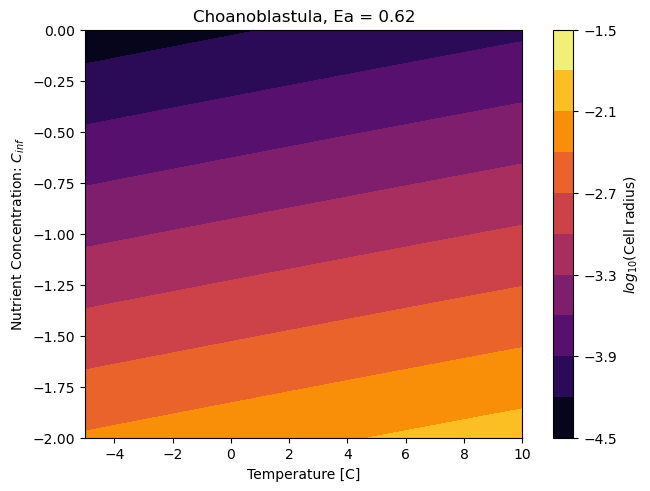

In [14]:
Ci = np.linspace(-2,0,100)
Cs = 10**Ci #Concentration of limiting nutrient far away from the organism [M_O2]


Ea0 = 0.62
Ea1 = 0.22
Ea2 = 0.15

aa0 = []
aa1 = []
aa2 = []
aaa= []

for Cinf in Cs:
    a0 = VolvoxRad(T,Cinf,Ea0)
    aa0.append(a0)
    aaa.append(a0)

    a1 = VolvoxRad(T,Cinf,Ea1)
    aa1.append(a1)
    aaa.append(a1)

    a2 = VolvoxRad(T,Cinf,Ea2)
    aa2.append(a2)
    aaa.append(a2)



Tc = T-273.15

levels = np.linspace(np.min(np.log10(aaa)), np.max(np.log10(aaa)), 8)
levels = np.linspace(-4.5, -1.5, 11)                               

fig, axs = plt.subplots(1,3,sharex=True,sharey=True,layout='constrained',figsize=(15, 4))
t, c = np.meshgrid(Tc, Cs)

cs0 = axs[0].contourf(t,np.log10(c),np.log10(aa0),levels=levels,cmap='inferno')
plt.subplot(1,3,1)
axs[0].set_ylabel('Nutrient Concentration: '+r'$(C_{inf})$')
axs[0].set_title('Ea = %.2f'%Ea0)


cs1 = axs[1].contourf(t,np.log10(c),np.log10(aa1),levels=levels,cmap='inferno')
plt.subplot(1,3,2)
axs[1].set_xlabel('Temperature [C]')
axs[1].set_title('Ea = %.2f'%Ea1)

cs2 = axs[2].contourf(t,np.log10(c),np.log10(aa2),levels=levels,cmap='inferno')
plt.subplot(1,3,3)
cbar = fig.colorbar(cs2)
axs[2].set_title('Ea = %.2f'%Ea2)

cbar.ax.set_ylabel(r'$log_{10}$(Cell radius)')

plt.show()



fig, axs = plt.subplots(1,1,layout = 'constrained')
t, c = np.meshgrid(Tc, Cs)
levels = np.linspace(-4.5, -1.5, 11)    

cs = axs.contourf(t,np.log10(c),np.log10(aa0),levels=levels,cmap='inferno')
axs.set_ylabel('Nutrient Concentration: '+r'$C_{inf}$')
axs.set_title('Choanoblastula, Ea = %.2f' %Ea0)
axs.set_xlabel('Temperature [C]')
cbar = fig.colorbar(cs)
cbar.ax.set_ylabel(r'$log_{10}$(Cell radius)')
plt.show()

### Organism Size Dependence of Uptake and Metabolic Components:

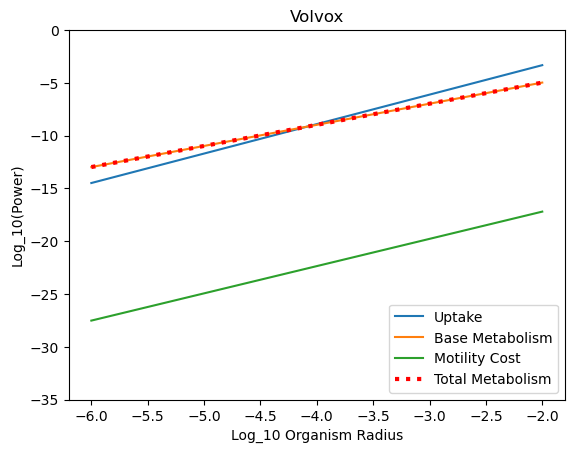

In [15]:
# Variables
T = 273.15  #Temperature [K]
a = []
for i in np.linspace(-6,-2,100):
    a.append(10**i)
xx = []
yy = []
zz = []
tt = []
# Model Equation:
Cinf = 0.1
for aa in a:
    X = Cinf*np.pi*beta*eta0**-m *np.exp(-m*A/(T-C))*aa**(2+b)
    Y = 4*B0*np.exp(Ea*(T-T0)/(K*T*T0))*r*aa**2
    Z = 6*np.pi*eta0**3 * beta**2* rho *aa**(1+2*b)* np.exp(A*(1-2*m)/(T-C))/epsilon
    tt.append(Y+Z)
    xx.append(X)
    yy.append(Y)
    zz.append(Z)

plt.plot(np.log10(a),np.log10(xx),label='Uptake')
plt.plot(np.log10(a),np.log10(yy),label='Base Metabolism')
plt.plot(np.log10(a),np.log10(zz),label='Motility Cost')
plt.plot(np.log10(a),np.log10(tt),':r',linewidth='3',label='Total Metabolism')
plt.title('Volvox')
plt.xlabel('Log_10 Organism Radius')
plt.ylabel('Log_10(Power)')
#ticks = plt.yticks()
plt.yticks(ticks = [-35,-30,-25,-20,-15,-10,-5,0])
plt.ylim(bottom = -35,top = 0)
plt.legend(loc = 'lower right')
plt.show()